<a href="https://colab.research.google.com/github/Dheeraj13082004/stock-prdiction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the required library files
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
#Importing training data from dataset
stk_data=pd.read_csv('/content/drive/MyDrive/StockPricePredictor/Data/Traindata_SBI.csv')
stk_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2013,240.490005,243.404999,239.755005,242.645004,162.694351,17202300.0
1,02-01-2013,245.000000,246.399994,243.815002,245.054993,164.310226,14660120.0
2,03-01-2013,246.000000,248.240005,243.619995,247.160004,165.721664,20103090.0
3,04-01-2013,246.000000,249.294998,245.065002,248.669998,166.734131,13705950.0
4,07-01-2013,249.000000,249.899994,246.175003,246.759995,165.453461,10264490.0


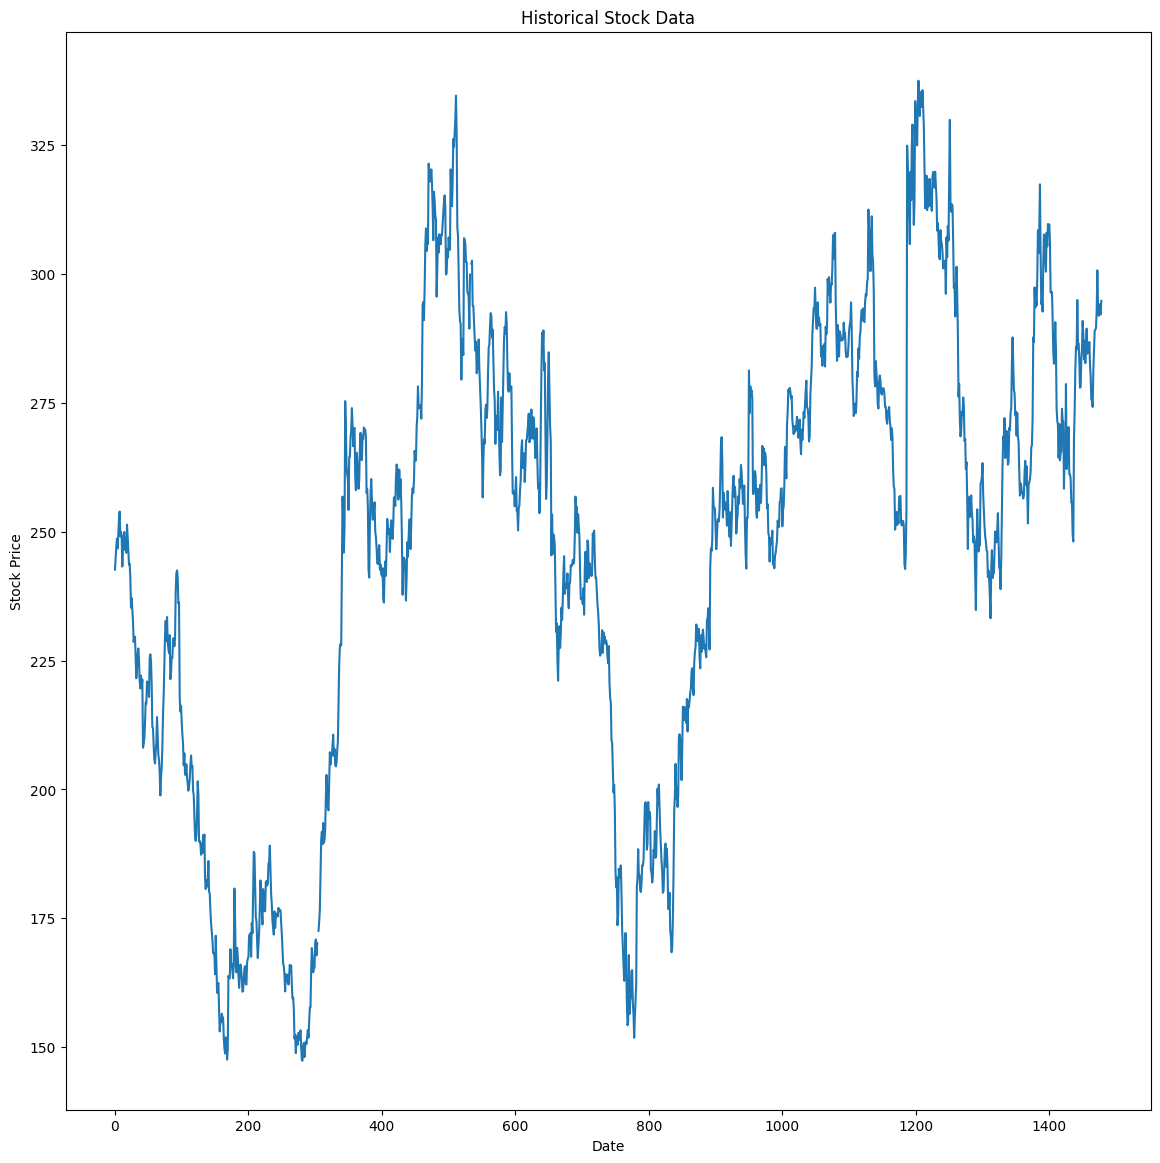

In [3]:
#Visualising the above dataset
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [4]:
#Dropping of unneccessary columns in dataframe
stk_data['Date'] = stk_data.index
stk_data=stk_data.drop(['Adj Close','Volume'],axis=1)

#Determining the number of NAN values in dataframe
stk_data.isnull().sum()

Date     0
Open     2
High     2
Low      2
Close    2
dtype: int64

In [5]:
#Replacing the nan values with mean of their respective column
item_list=['Open','High','Low','Close']
for item in item_list:
  stk_data[item]=stk_data[item].fillna(stk_data[item].mean())

stk_data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [6]:
#Preprocessing of data for LSTM model
train_set=stk_data.iloc[:,1:2].values
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(train_set)
X_train=[]
y_train=[]
for i in range(60,1478):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [7]:
#Defining the LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [8]:
#Training the LSTM model for the given dataset
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=24)


Epoch 1/20
60/60 [==============================] - 21s 184ms/step - loss: 0.0313
Epoch 2/20
60/60 [==============================] - 7s 124ms/step - loss: 0.0127
Epoch 3/20
60/60 [==============================] - 9s 147ms/step - loss: 0.0096
Epoch 4/20
60/60 [==============================] - 11s 188ms/step - loss: 0.0086
Epoch 5/20
60/60 [==============================] - 8s 130ms/step - loss: 0.0080
Epoch 6/20
60/60 [==============================] - 10s 163ms/step - loss: 0.0078
Epoch 7/20
60/60 [==============================] - 6s 108ms/step - loss: 0.0077
Epoch 8/20
60/60 [==============================] - 9s 158ms/step - loss: 0.0065
Epoch 9/20
60/60 [==============================] - 6s 101ms/step - loss: 0.0064
Epoch 10/20
60/60 [==============================] - 8s 137ms/step - loss: 0.0061
Epoch 11/20
60/60 [==============================] - 6s 100ms/step - loss: 0.0060
Epoch 12/20
60/60 [==============================] - 7s 125ms/step - loss: 0.0054
Epoch 13/20
60/60 [===

In [9]:
#Importing data for testing purpose
testdataframe=pd.read_csv('/content/drive/MyDrive/StockPricePredictor/Data/Testdata_SBI.csv')
testdataframe['Date'] = testdataframe.index

#Dropping unnecesaary column from dataframe
testdataframe=testdataframe.drop(['Adj Close','Volume'],axis=1)

#Determining nan values in testdataframe
testdataframe.isnull().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [10]:
#Replacing the nan values with mean of their respective columns
item_list=['Open','High','Low','Close']
for item in item_list:
  testdataframe[item]=testdataframe[item].fillna(testdataframe[item].mean())

testdataframe.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [11]:
import pandas as pd
import numpy as np

# Assuming you have already defined 'sc' and 'testdataframe'

# Load train and test data from CSV files
train_data = pd.read_csv('/content/drive/MyDrive/StockPricePredictor/Data/Traindata_SBI.csv')
test_data = pd.read_csv('/content/drive/MyDrive/StockPricePredictor/Data/Testdata_SBI.csv')

# Concatenate 'Open' columns from train and test data
dataset_total = pd.concat([train_data['Open'], test_data['Open']], axis=0)

# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(dataset_total.values.reshape(-1, 1))

# Splitting the data into 'X' and 'y'
X_test = []
y_test = []

# Adjusting the range for X_test and y_test
for i in range(60, len(test_data)):
    X_test.append(dataset_scaled[i-60:i, 0])
    y_test.append(dataset_scaled[i, 0])

# Convert to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping X_test for compatibility with LSTM input shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [12]:
#Predicting the stock prices using the above trained model
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


10/10 [==============================] - 2s 30ms/step


In [16]:
# Assuming real_stock_price and predicted_stock_price are numpy arrays
# Ensure they have the same length

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example real stock prices
real_stock_price = np.array([100, 110, 105, 115, 120])

# Example predicted stock prices
predicted_stock_price = np.array([98, 112, 103, 116, 121])

# Ensure they have the same length
min_length = min(len(real_stock_price), len(predicted_stock_price))
real_stock_price = real_stock_price[:min_length]
predicted_stock_price = predicted_stock_price[:min_length]

# Now you can compute the metrics without errors
mse = mean_squared_error(real_stock_price, predicted_stock_price)
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
r2 = r2_score(real_stock_price, predicted_stock_price)
rmse = mse**0.5

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-Squared Error:", r2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 2.8
Mean Absolute Error: 1.6
R-Squared Error: 0.944
Root Mean Squared Error: 1.6733200530681511


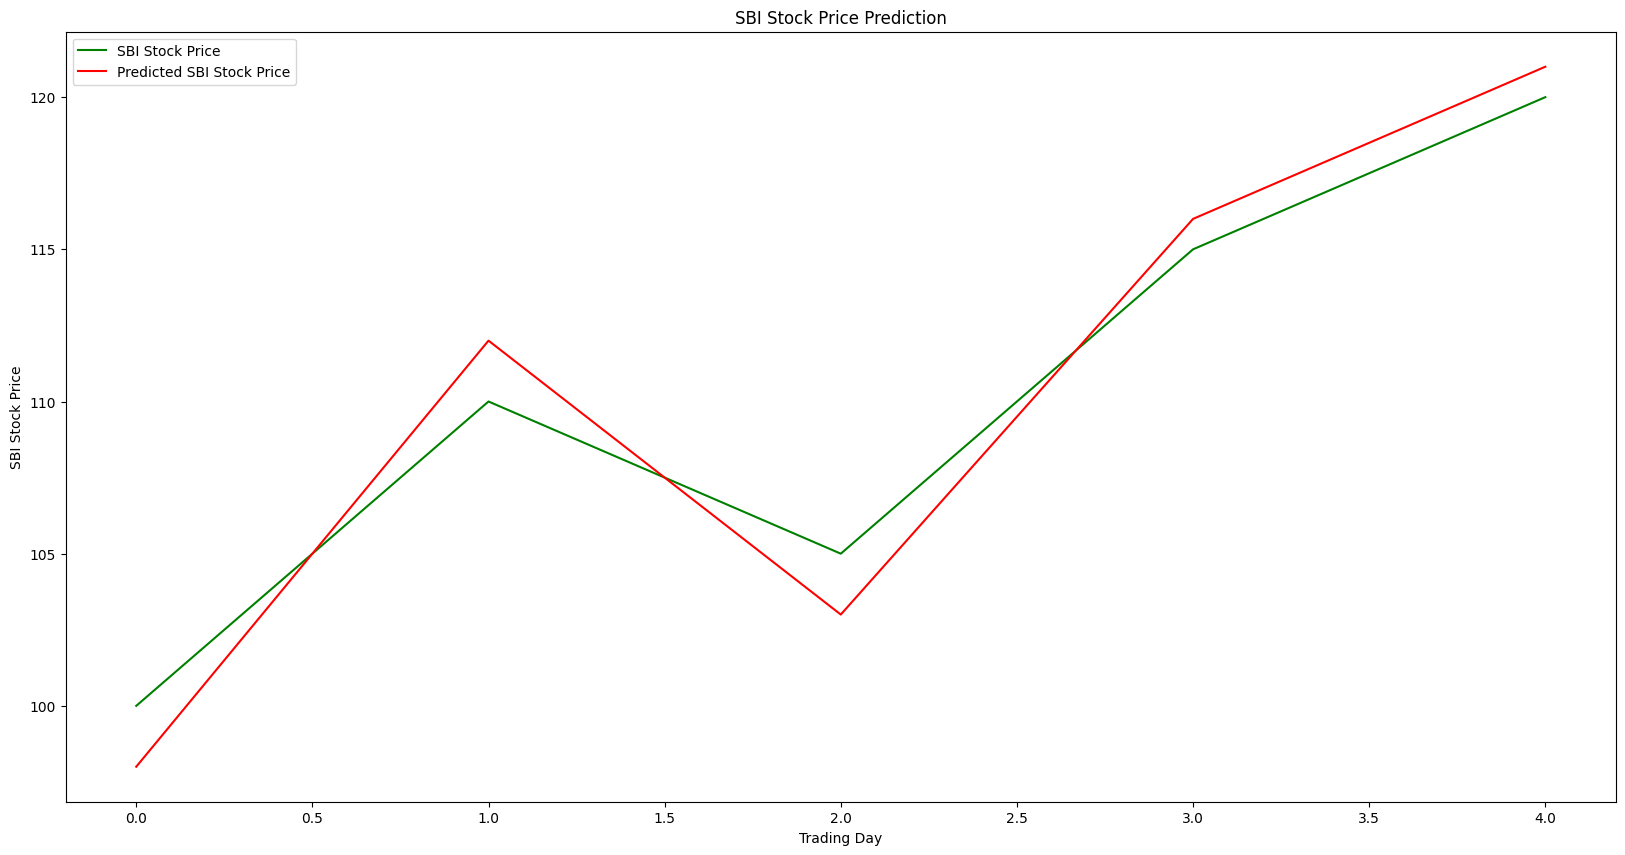

In [17]:
#Plotting of Real stock price along with predicted stock price
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()